<a href="https://colab.research.google.com/github/Abre1234/Transport-and-logistics/blob/main/Nee_cost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# 📦 Data Handling
import pandas as pd
import numpy as np

# 📊 Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ⚙️ Preprocessing & Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 🚀 Deployment
import gradio as gr

# ✅ Style for plots
sns.set(style="whitegrid")

In [17]:
import pandas as pd
import requests
import io

# File path (adjusted to the raw file URL on GitHub)
file_url = "https://github.com/Abre1234/Transport-and-logistics/raw/main/trans_dataset.xlsx"

# Download the file
response = requests.get(file_url)
response.raise_for_status() # Raise an exception for bad status codes

# Read the Excel file from the downloaded content
df = pd.read_excel(io.BytesIO(response.content))

# Preview the first 5 rows
display(df.head())

,የመኪና_አይነት,የመኪና_ደረጃ,የመንገድ_አይነት,ቀን,የናፍጣ_ዋጋ,የቤንዚን_ዋጋ,የቀደመው_ነባር_ታሪፍ_ኪሜ,አዲስ_ታሪፍ_ኪሜ
0,አነስተኛ,ደረጃ_1,አስፓልት,30/08/2017,98.98,112.67,2.1508,2.3010
1,አነስተኛ,ደረጃ_1,ጠጠር,30/08/2017,98.98,112.67,2.2928,2.4244
2,አነስተኛ,ደረጃ_1,ዩራፕ,30/08/2017,98.98,112.67,2.3509,2.6675
3,አነስተኛ,ደረጃ_2,አስፓልት,30/08/2017,98.98,112.67,2.1245,2.2445
4,አነስተኛ,ደረጃ_2,ጠጠር,30/08/2017,98.98,112.67,2.2328,2.3810


In [18]:
# Dataset Info
print("📦 Dataset Info:")
df.info()

📦 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   የመኪና_አይነት         72 non-null     object 
 1   የመኪና_ደረጃ          72 non-null     object 
 2   የመንገድ_አይነት        72 non-null     object 
 3   ቀን                72 non-null     object 
 4   የናፍጣ_ዋጋ           72 non-null     float64
 5   የቤንዚን_ዋጋ          72 non-null     float64
 6   የቀደመው_ነባር_ታሪፍ_ኪሜ  72 non-null     float64
 7   አዲስ_ታሪፍ_ኪሜ        72 non-null     float64
dtypes: float64(4), object(4)
memory usage: 4.6+ KB


In [19]:
# Check duplicates
print("\n🧹 Duplicated Rows:", df.duplicated().sum())


🧹 Duplicated Rows: 0


In [20]:
# Basic statistics
print("\n📊 Statistical Summary:")
display(df.describe(include='all'))


📊 Statistical Summary:


,የመኪና_አይነት,የመኪና_ደረጃ,የመንገድ_አይነት,ቀን,የናፍጣ_ዋጋ,የቤንዚን_ዋጋ,የቀደመው_ነባር_ታሪፍ_ኪሜ,አዲስ_ታሪፍ_ኪሜ
count,72,72,72,72,72.000000,72.000000,72.000000,72.000000
unique,2,3,3,4,NaN,NaN,NaN,NaN
top,አነስተኛ,ደረጃ_1,አስፓልት,30/08/2017,NaN,NaN,NaN,NaN
freq,36,24,24,18,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,74.127500,76.097500,1.355597,1.518324
std,NaN,NaN,NaN,NaN,19.633571,24.657253,0.549878,0.550569
min,NaN,NaN,NaN,NaN,46.490000,47.830000,0.521600,0.805700
25%,NaN,NaN,NaN,NaN,62.097500,57.925000,0.915475,0.978650
50%,NaN,NaN,NaN,NaN,75.520000,71.945000,1.303400,1.408750
75%,NaN,NaN,NaN,NaN,87.550000,90.117500,1.808850,1.944800


In [21]:
import matplotlib.font_manager as fm
import requests
import os

# URL of the font file
font_url = "https://github.com/Abre1234/Transport-and-logistics/raw/main/NotoSansEthiopic-Regular.ttf"
# Local path to save the font file
font_path = "NotoSansEthiopic-Regular.ttf"

# Download the font file
try:
    response = requests.get(font_url)
    response.raise_for_status() # Raise an exception for bad status codes
    with open(font_path, 'wb') as f:
        f.write(response.content)
    print(f"Font downloaded successfully to {font_path}")
except requests.exceptions.RequestException as e:
    print(f"Error downloading font: {e}")
    font_path = None # Set font_path to None if download fails

# Load the font if download was successful
if font_path and os.path.exists(font_path):
    try:
        ethiopic_font = fm.FontProperties(fname=font_path)
        # Add the font to matplotlib's font cache
        fm.fontManager.addfont(font_path)
        # Set globally
        plt.rcParams['font.family'] = ethiopic_font.get_name()
        print(f"Font '{ethiopic_font.get_name()}' loaded and set globally.")
    except Exception as e:
        print(f"Error loading font: {e}")
else:
    print("Font file not found locally after download attempt.")

Font downloaded successfully to NotoSansEthiopic-Regular.ttf
Font 'Noto Sans Ethiopic' loaded and set globally.


Distribution of target variable

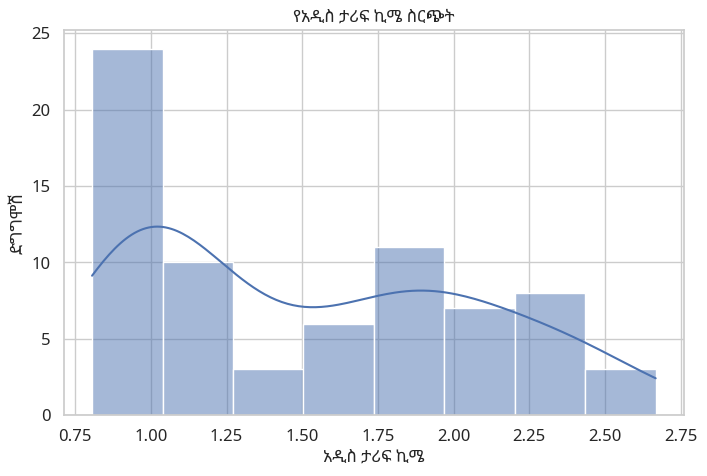

In [22]:
plt.figure(figsize=(8, 5))
sns.histplot(df["አዲስ_ታሪፍ_ኪሜ"], kde=True)
plt.title("የአዲስ ታሪፍ ኪሜ ስርጭት", fontproperties=ethiopic_font)
plt.xlabel("አዲስ ታሪፍ ኪሜ", fontproperties=ethiopic_font)
plt.ylabel("ድግግሞሽ", fontproperties=ethiopic_font)
plt.xticks(fontproperties=ethiopic_font)
plt.yticks(fontproperties=ethiopic_font)
plt.show()

Compare tariff by car type

/tmp/ipython-input-23-3978316726.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="የመኪና_አይነት", y="አዲስ_ታሪፍ_ኪሜ", palette="Set2")


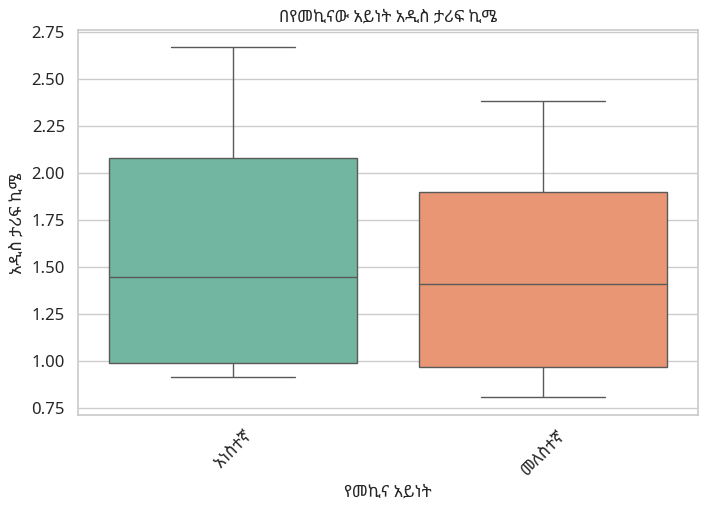

In [23]:


plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="የመኪና_አይነት", y="አዲስ_ታሪፍ_ኪሜ", palette="Set2")
plt.title("በየመኪናው አይነት አዲስ ታሪፍ ኪሜ", fontproperties=ethiopic_font)
plt.xlabel("የመኪና አይነት", fontproperties=ethiopic_font)
plt.ylabel("አዲስ ታሪፍ ኪሜ", fontproperties=ethiopic_font)
plt.xticks(rotation=45, fontproperties=ethiopic_font)
plt.yticks(fontproperties=ethiopic_font)
plt.show()

/tmp/ipython-input-24-2262702280.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=road_type_avg, x="የመንገድ_አይነት", y="አዲስ_ታሪፍ_ኪሜ", palette="Set3")


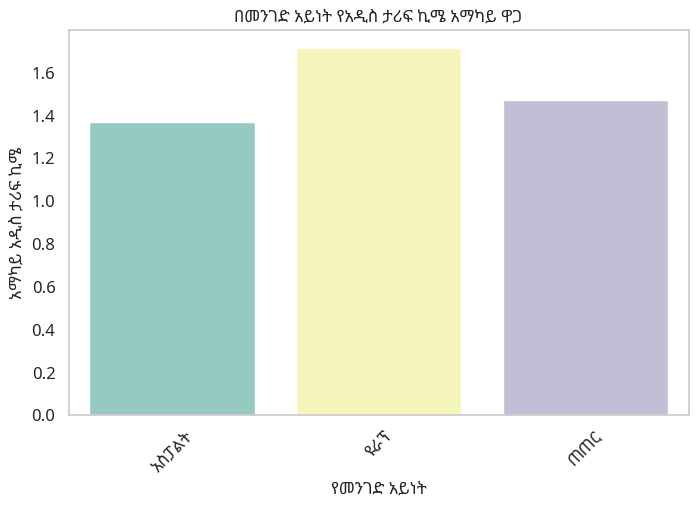

In [24]:

road_type_avg = df.groupby("የመንገድ_አይነት")["አዲስ_ታሪፍ_ኪሜ"].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=road_type_avg, x="የመንገድ_አይነት", y="አዲስ_ታሪፍ_ኪሜ", palette="Set3")
plt.title("በመንገድ አይነት የአዲስ ታሪፍ ኪሜ አማካይ ዋጋ", fontproperties=ethiopic_font)
plt.xlabel("የመንገድ አይነት", fontproperties=ethiopic_font)
plt.ylabel("አማካይ አዲስ ታሪፍ ኪሜ", fontproperties=ethiopic_font)
plt.xticks(rotation=45, fontproperties=ethiopic_font)
plt.yticks(fontproperties=ethiopic_font)
plt.grid(axis="y")
plt.show()

Grouped plot

/tmp/ipython-input-25-1946490482.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x="GroupLabel", y="አዲስ_ታሪፍ_ኪሜ", palette="viridis")


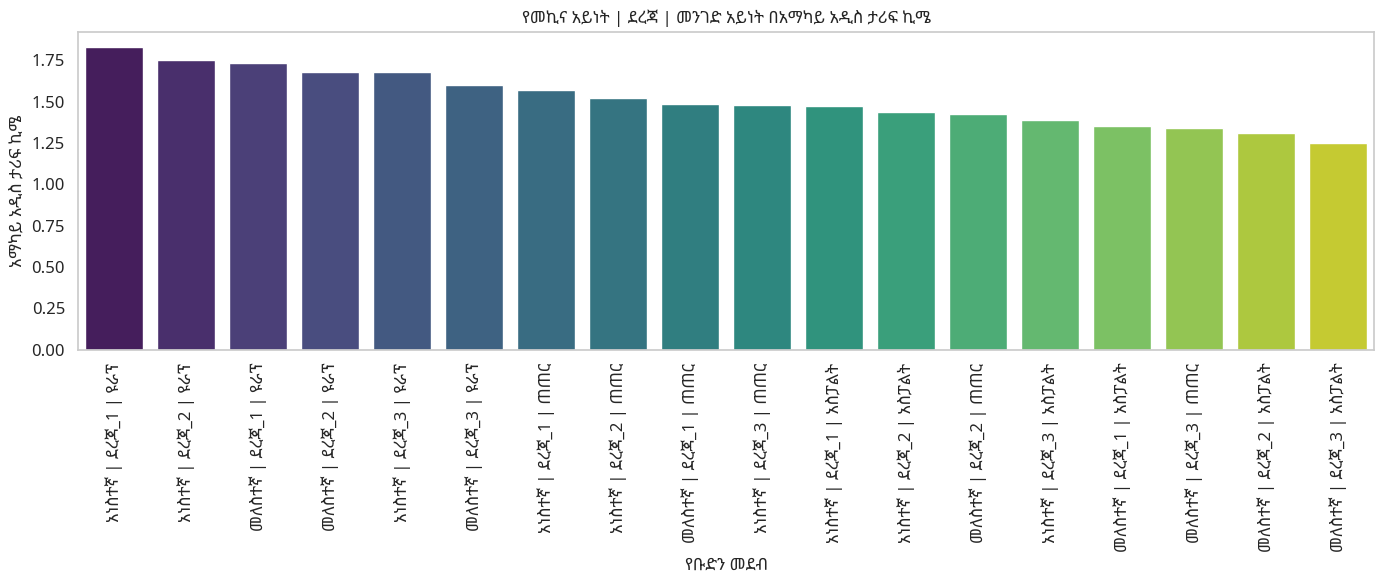

In [25]:

# Group by the 3 categorical variables and calculate average cost per km
grouped = df.groupby(["የመኪና_አይነት", "የመኪና_ደረጃ", "የመንገድ_አይነት"])["አዲስ_ታሪፍ_ኪሜ"].mean().reset_index()

# Create a combined label to use on x-axis
grouped["GroupLabel"] = grouped["የመኪና_አይነት"] + " | " + grouped["የመኪና_ደረጃ"] + " | " + grouped["የመንገድ_አይነት"]

# Sort by average cost to make it readable
grouped = grouped.sort_values(by="አዲስ_ታሪፍ_ኪሜ", ascending=False)

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(data=grouped, x="GroupLabel", y="አዲስ_ታሪፍ_ኪሜ", palette="viridis")

plt.title("የመኪና አይነት | ደረጃ | መንገድ አይነት በአማካይ አዲስ ታሪፍ ኪሜ", fontproperties=ethiopic_font)
plt.xlabel("የቡድን መደብ", fontproperties=ethiopic_font)
plt.ylabel("አማካይ አዲስ ታሪፍ ኪሜ", fontproperties=ethiopic_font)

plt.xticks(rotation=90, fontproperties=ethiopic_font)
plt.yticks(fontproperties=ethiopic_font)
plt.tight_layout()
plt.grid(axis="y")
plt.show()

For time with new cost

In [26]:
import pandas as pd

# Ensure 'ቀን' is datetime
df['ቀን'] = pd.to_datetime(df['ቀን'], errors='coerce', dayfirst=True)

# Sort the dataframe by date
df = df.sort_values(by='ቀን')

# Extract year and month
df['ዓመት'] = df['ቀን'].dt.year
df['ወር'] = df['ቀን'].dt.month

# Display to confirm
display(df[['ቀን', 'ዓመት', 'ወር']].head())

,ቀን,ዓመት,ወር
71,2014-10-30,2014,10
54,2014-10-30,2014,10
55,2014-10-30,2014,10
56,2014-10-30,2014,10
57,2014-10-30,2014,10


In [27]:
import pandas as pd

# Create combined Year-Month for better time series visuals and potential features
df['ዓመት_ወር'] = df['ቀን'].dt.to_period('M').astype(str)

# Ensure the time series is sorted by date
df = df.sort_values(by='ቀን')

# Display the updated dataframe with the new column and sorted dates
display(df[['ቀን', 'ዓመት_ወር']].head())

,ቀን,ዓመት_ወር
71,2014-10-30,2014-10
62,2014-10-30,2014-10
69,2014-10-30,2014-10
68,2014-10-30,2014-10
67,2014-10-30,2014-10


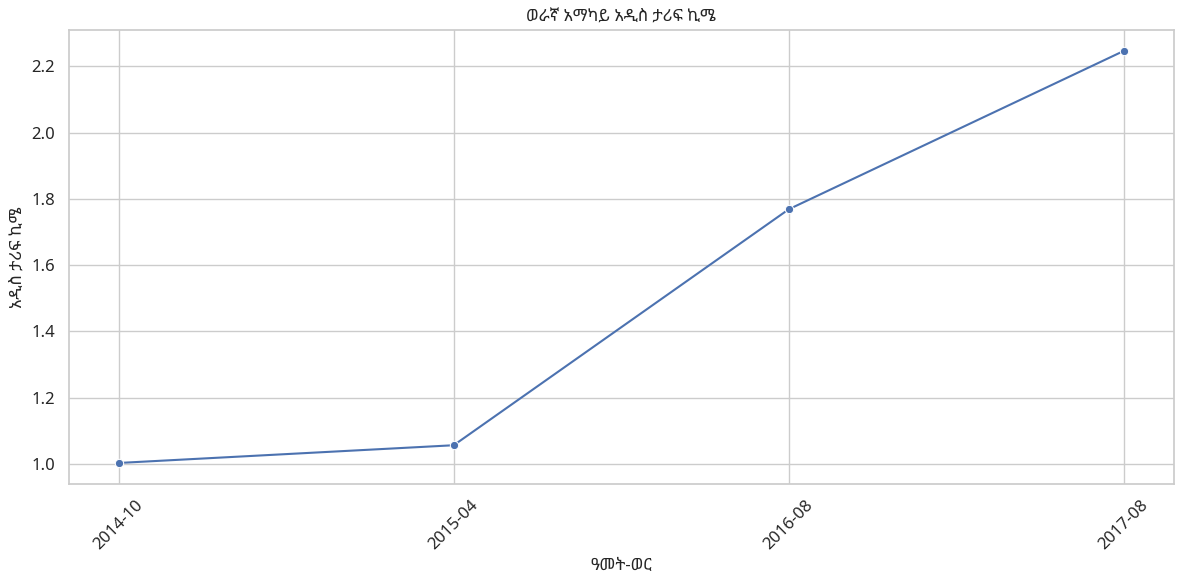

In [28]:


# Group and average by year-month
monthly_avg = df.groupby('ዓመት_ወር')['አዲስ_ታሪፍ_ኪሜ'].mean().reset_index()

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_avg, x='ዓመት_ወር', y='አዲስ_ታሪፍ_ኪሜ', marker='o')
plt.title("ወራኛ አማካይ አዲስ ታሪፍ ኪሜ", fontproperties=ethiopic_font)
plt.xlabel("ዓመት-ወር", fontproperties=ethiopic_font)
plt.ylabel("አዲስ ታሪፍ ኪሜ", fontproperties=ethiopic_font)
plt.xticks(rotation=45, fontproperties=ethiopic_font)
plt.yticks(fontproperties=ethiopic_font)
plt.tight_layout()
plt.show()

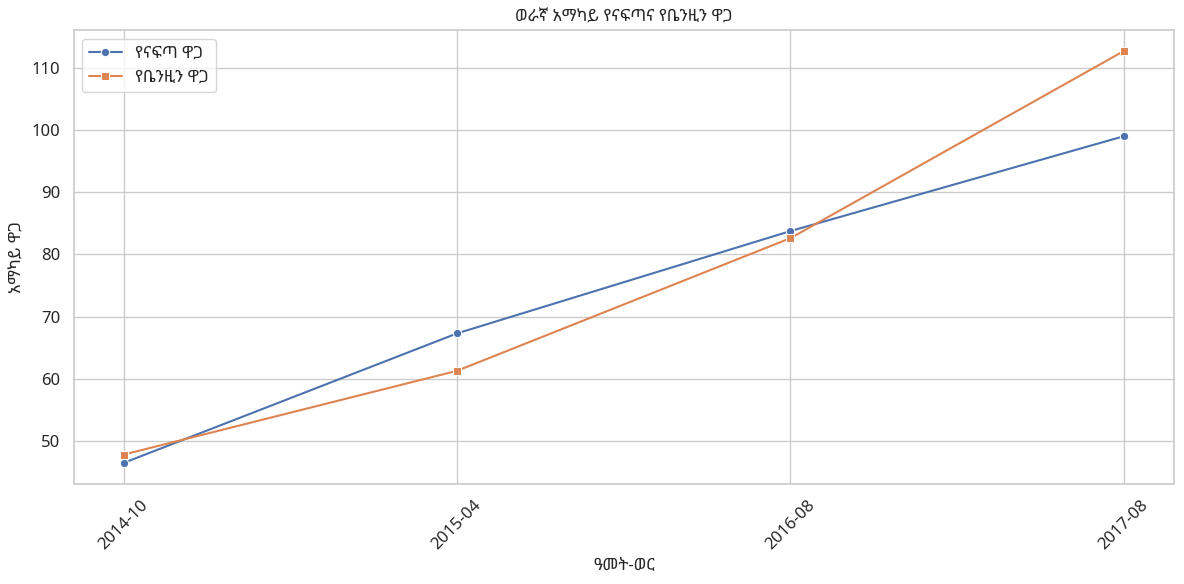

In [29]:

# Group by year-month and calculate average for each fuel price
monthly_fuel = df.groupby('ዓመት_ወር')[['የናፍጣ_ዋጋ', 'የቤንዚን_ዋጋ']].mean().reset_index()

# Plot both fuel prices on the same line chart
plt.figure(figsize=(12, 6))

sns.lineplot(data=monthly_fuel, x='ዓመት_ወር', y='የናፍጣ_ዋጋ', label='የናፍጣ ዋጋ', marker='o')
sns.lineplot(data=monthly_fuel, x='ዓመት_ወር', y='የቤንዚን_ዋጋ', label='የቤንዚን ዋጋ', marker='s')

# Titles and labels
plt.title("ወራኛ አማካይ የናፍጣና የቤንዚን ዋጋ", fontproperties=ethiopic_font)
plt.xlabel("ዓመት-ወር", fontproperties=ethiopic_font)
plt.ylabel("አማካይ ዋጋ", fontproperties=ethiopic_font)
plt.xticks(rotation=45, fontproperties=ethiopic_font)
plt.yticks(fontproperties=ethiopic_font)
plt.legend(prop=ethiopic_font)
plt.tight_layout()
plt.show()

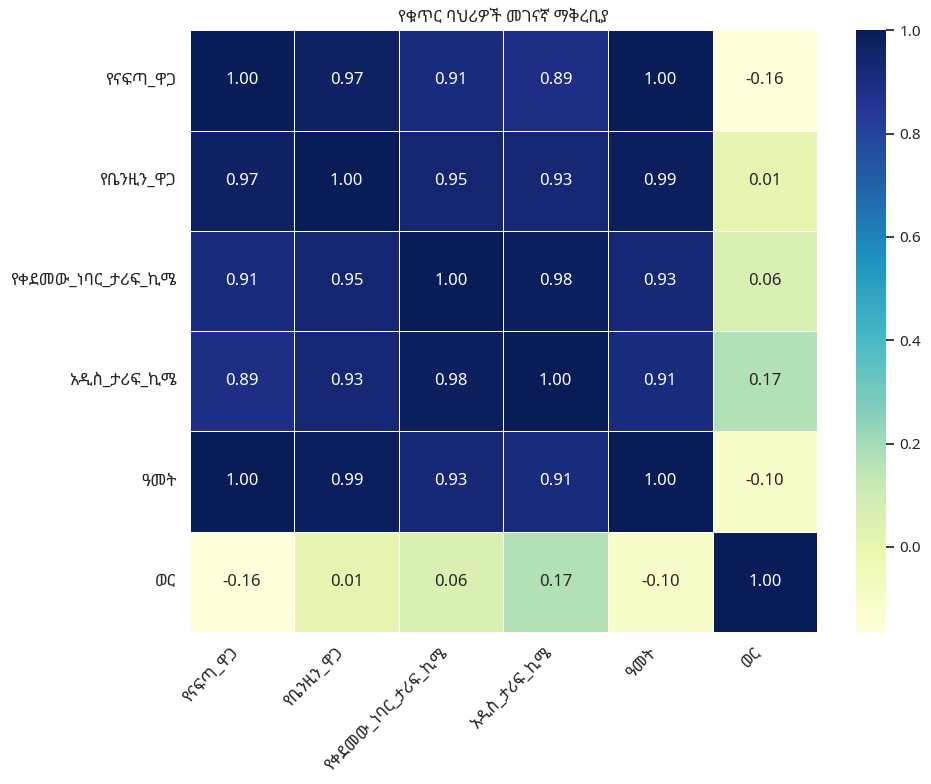

In [30]:



# Select only numerical columns for correlation
numeric_cols = df.select_dtypes(include=np.number)

# Compute correlation matrix
corr = numeric_cols.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5,
            annot_kws={"fontproperties": ethiopic_font},
            xticklabels=[label for label in numeric_cols.columns],
            yticklabels=[label for label in numeric_cols.columns])

plt.title("የቁጥር ባህሪዎች መገናኛ ማቅረቢያ", fontproperties=ethiopic_font)
plt.xticks(rotation=45, fontproperties=ethiopic_font, ha='right')
plt.yticks(rotation=0, fontproperties=ethiopic_font)
plt.tight_layout()
plt.show()

Data Preprocess

In [31]:
import numpy as np

np.random.seed(42)  # For reproducibility

n = 5  # number of rows

data = {
    "የመኪና_አይነት": np.random.choice(["አነስተኛ", "መለስተኛ"], size=n),
    "የመኪና_ደረጃ": np.random.choice(["ደረጃ_1", "ደረጃ_2", "ደረጃ_3"], size=n),
    "የመንገድ_አይነት": np.random.choice(["አስፓልት", "ጠጠር", "ዩራፕ"], size=n),
    "ቀን": pd.date_range("2017-01-01", periods=n, freq="M"),
    "የናፍጣ_ዋጋ": np.random.uniform(95, 200, n).round(2),
    "የቤንዚን_ዋጋ": np.random.uniform(105, 220, n).round(2),
}

# Generate base previous tariff
prev_tariff = np.random.uniform(2.1, 4.1, n).round(4)
# Add some noise to simulate realistic change
new_tariff = (prev_tariff + np.random.uniform(0.1, 0.5, n)).round(4)

data["የቀደመው_ነባር_ታሪፍ_ኪሜ"] = prev_tariff
data["አዲስ_ታሪፍ_ኪሜ"] = new_tariff

# Create DataFrame
df_synthetic = pd.DataFrame(data)

# Preview
df_synthetic.head()

/tmp/ipython-input-31-3888175935.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "ቀን": pd.date_range("2017-01-01", periods=n, freq="M"),


,የመኪና_አይነት,የመኪና_ደረጃ,የመንገድ_አይነት,ቀን,የናፍጣ_ዋጋ,የቤንዚን_ዋጋ,የቀደመው_ነባር_ታሪፍ_ኪሜ,አዲስ_ታሪፍ_ኪሜ
0,አነስተኛ,ደረጃ_1,ዩራፕ,2017-01-31,97.16,126.09,3.3237,3.7378
1,መለስተኛ,ደረጃ_1,ዩራፕ,2017-02-28,196.84,139.99,2.3790,2.5589
2,አነስተኛ,ደረጃ_3,ዩራፕ,2017-03-31,182.41,165.35,2.6843,2.9900
3,አነስተኛ,ደረጃ_2,አስፓልት,2017-04-30,117.30,154.67,2.8327,3.1697
4,አነስተኛ,ደረጃ_3,ዩራፕ,2017-05-31,114.09,138.49,3.0121,3.1307


In [32]:

# Label Encoding for categorical features (fit on combined data to ensure all categories are seen)
categorical_cols = ['የመኪና_አይነት', 'የመኪና_ደረጃ', 'የመንገድ_አይነት']
label_encoders = {}
# Temporarily combine for fitting the encoder
df_temp = pd.concat([df[categorical_cols], df_synthetic[categorical_cols]], ignore_index=True)
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    # Fit on the temporary combined data which includes all categories from both original and synthetic data
    label_encoders[col].fit(df_temp[col])
    df[col] = label_encoders[col].transform(df[col])
    df_synthetic[col] = label_encoders[col].transform(df_synthetic[col])

display(df.head())
display(df_synthetic.head())

,የመኪና_አይነት,የመኪና_ደረጃ,የመንገድ_አይነት,ቀን,የናፍጣ_ዋጋ,የቤንዚን_ዋጋ,የቀደመው_ነባር_ታሪፍ_ኪሜ,አዲስ_ታሪፍ_ኪሜ,ዓመት,ወር,ዓመት_ወር
71,0,2,1,2014-10-30,46.49,47.83,0.8662,1.0840,2014,10,2014-10
62,1,2,1,2014-10-30,46.49,47.83,0.8398,1.0938,2014,10,2014-10
69,0,2,0,2014-10-30,46.49,47.83,0.5216,0.8057,2014,10,2014-10
68,0,1,1,2014-10-30,46.49,47.83,0.9584,1.1719,2014,10,2014-10
67,0,1,2,2014-10-30,46.49,47.83,0.7374,0.9155,2014,10,2014-10


,የመኪና_አይነት,የመኪና_ደረጃ,የመንገድ_አይነት,ቀን,የናፍጣ_ዋጋ,የቤንዚን_ዋጋ,የቀደመው_ነባር_ታሪፍ_ኪሜ,አዲስ_ታሪፍ_ኪሜ
0,1,0,1,2017-01-31,97.16,126.09,3.3237,3.7378
1,0,0,1,2017-02-28,196.84,139.99,2.3790,2.5589
2,1,2,1,2017-03-31,182.41,165.35,2.6843,2.9900
3,1,1,0,2017-04-30,117.30,154.67,2.8327,3.1697
4,1,2,1,2017-05-31,114.09,138.49,3.0121,3.1307


In [33]:
# Split the original DataFrame `df` into training and testing parts
# Using a small test size to keep a larger portion for combining with synthetic data
df_train_original, df_test_original = train_test_split(df, test_size=0.2, random_state=42)

# Concatenate the synthetic DataFrame with the training portion of the original DataFrame
df_combined_train = pd.concat([df_synthetic, df_train_original], ignore_index=True)

# Display the head of the combined training DataFrame
display(df_combined_train.head())

,የመኪና_አይነት,የመኪና_ደረጃ,የመንገድ_አይነት,ቀን,የናፍጣ_ዋጋ,የቤንዚን_ዋጋ,የቀደመው_ነባር_ታሪፍ_ኪሜ,አዲስ_ታሪፍ_ኪሜ,ዓመት,ወር,ዓመት_ወር
0,1,0,1,2017-01-31,97.16,126.09,3.3237,3.7378,NaN,NaN,NaN
1,0,0,1,2017-02-28,196.84,139.99,2.3790,2.5589,NaN,NaN,NaN
2,1,2,1,2017-03-31,182.41,165.35,2.6843,2.9900,NaN,NaN,NaN
3,1,1,0,2017-04-30,117.30,154.67,2.8327,3.1697,NaN,NaN,NaN
4,1,2,1,2017-05-31,114.09,138.49,3.0121,3.1307,NaN,NaN,NaN


In [34]:
# Define features (X) and target (y) for training
# Exclude the 'ቀን' and 'ዓመት_ወር' columns as they are not numerical features for the model
X_train = df_combined_train.drop(['አዲስ_ታሪፍ_ኪሜ', 'ቀን', 'ዓመት_ወር', 'ዓመት', 'ወር'], axis=1)
y_train = df_combined_train['አዲስ_ታሪፍ_ኪሜ']

# Instantiate and train a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

print("Random Forest Regressor model trained successfully.")

Random Forest Regressor model trained successfully.


In [35]:
# Define features (X_test) and target (y_test) from the df_test_original DataFrame
X_test = df_test_original.drop(['አዲስ_ታሪፍ_ኪሜ', 'ቀን', 'ዓመት_ወር', 'ዓመት', 'ወር'], axis=1) # Exclude 'ቀን' and 'ዓመት_ወር' from test features as well
y_test = df_test_original['አዲስ_ታሪፍ_ኪሜ']

# Use the trained rf_model to make predictions on the X_test data
y_pred = rf_model.predict(X_test)

# Calculate the evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the calculated evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 0.0494611999999996
Mean Squared Error (MSE): 0.003804573141999927
Root Mean Squared Error (RMSE): 0.061681221956118276
R-squared (R2): 0.9867697798214041


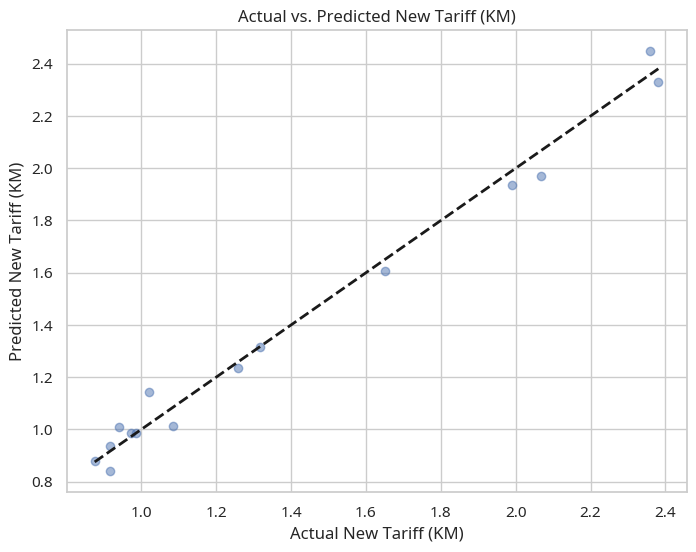

In [36]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Diagonal line for perfect predictions
plt.xlabel('Actual New Tariff (KM)')
plt.ylabel('Predicted New Tariff (KM)')
plt.title('Actual vs. Predicted New Tariff (KM)')
plt.grid(True)
plt.show()

In [37]:
# Make predictions on the training data
y_train_pred = rf_model.predict(X_train)

# Calculate R-squared for the training set
r2_train = r2_score(y_train, y_train_pred)

# Print the R-squared for both training and testing sets
print(f"R-squared (R2) on Training Set: {r2_train}")
print(f"R-squared (R2) on Test Set: {r2}")

R-squared (R2) on Training Set: 0.995103835373725
R-squared (R2) on Test Set: 0.9867697798214041


In [ ]:
# Define the prediction function
def predict_tariff(car_type, car_level, road_type, diesel_price, benzine_price, previous_tariff):
    # Encode categorical features using the fitted label encoders
    car_type_encoded = label_encoders['የመኪና_አይነት'].transform([car_type])[0]
    car_level_encoded = label_encoders['የመኪና_ደረጃ'].transform([car_level])[0]
    road_type_encoded = label_encoders['የመንገድ_አይነት'].transform([road_type])[0]

    # Create a DataFrame with the input features
    input_data = pd.DataFrame([[car_type_encoded, car_level_encoded, road_type_encoded, diesel_price, benzine_price, previous_tariff]],
                              columns=['የመኪና_አይነት', 'የመኪና_ደረጃ', 'የመንገድ_አይነት', 'የናፍጣ_ዋጋ', 'የቤንዚን_ዋጋ', 'የቀደመው_ነባር_ታሪፍ_ኪሜ'])

    # Make the prediction
    prediction = rf_model.predict(input_data)

    return f"Predicted New Tariff (KM): {prediction[0]:.4f}"

# Create the Gradio interface
iface = gr.Interface(
    fn=predict_tariff,
    inputs=[
        gr.Dropdown(label="የመኪና አይነት", choices=list(label_encoders['የመኪና_አይነት'].classes_)),
        gr.Dropdown(label="የመኪና ደረጃ", choices=list(label_encoders['የመኪና_ደረጃ'].classes_)),
        gr.Dropdown(label="የመንገድ አይነት", choices=list(label_encoders['የመንገድ_አይነት'].classes_)),
        gr.Number(label="የናፍጣ ዋጋ"),
        gr.Number(label="የቤንዚን ዋጋ"),
        gr.Number(label="የቀደመው ነባር ታሪፍ ኪሜ")
    ],
    outputs="text",
    title="የአዲስ ታሪፍ ኪሜ ትንበያ ሞዴል",
    description="የተለያዩ ግብዓቶችን በመጠቀም የአዲስ ታሪፍ ኪሜን ይተንብዩ"
)

# Launch the interface
iface.launch(debug=True)

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://65024e17a3b19610bf.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
